In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import folium
import seaborn as sns
sns.set_theme()

In [2]:
df = pd.read_csv("../../../csv/v2/060_yonge_flow_processed.csv.zip")

In [3]:
df["collectedAt"] = pd.to_datetime(df["collectedAt"], utc=True)
df["collectedAt"] = df.collectedAt.dt.floor(freq="s")
df["year"] = df["collectedAt"].dt.year
df["month"] = df["collectedAt"].dt.month
df["day"] = df["collectedAt"].dt.day
df["hour"] = df["collectedAt"].dt.hour
df["dow"] = df["collectedAt"].dt.day_of_week
df["dow_name"] = df["collectedAt"].dt.day_name()
df["month_name"] = df["collectedAt"].dt.month_name()
df["year_month"] = df["collectedAt"].dt.to_period("M").astype(str)
df["year_month_day"] = df["collectedAt"].dt.to_period("D").astype(str)

C:\Users\felip\AppData\Local\Temp\ipykernel_19328\3071565371.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["year_month"] = df["collectedAt"].dt.to_period("M").astype(str)
C:\Users\felip\AppData\Local\Temp\ipykernel_19328\3071565371.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["year_month_day"] = df["collectedAt"].dt.to_period("D").astype(str)


In [4]:
df.head()

,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,roadClosure,coordinates,collectedAt,year,month,day,hour,dow,dow_name,month_name,year_month,year_month_day
0,10,18,100,56,False,"[{'latitude': 43.646886954993356, 'longitude':...",2022-07-14 12:45:00+00:00,2022,7,14,12,3,Thursday,July,2022-07,2022-07-14
1,13,17,77,59,False,"[{'latitude': 43.646886954993356, 'longitude':...",2022-07-14 12:51:44+00:00,2022,7,14,12,3,Thursday,July,2022-07,2022-07-14
2,18,18,56,56,False,"[{'latitude': 43.646886954993356, 'longitude':...",2022-07-14 12:55:27+00:00,2022,7,14,12,3,Thursday,July,2022-07,2022-07-14
3,13,18,77,56,False,"[{'latitude': 43.646886954993356, 'longitude':...",2022-07-14 13:00:00+00:00,2022,7,14,13,3,Thursday,July,2022-07,2022-07-14
4,14,17,72,59,False,"[{'latitude': 43.646886954993356, 'longitude':...",2022-07-14 13:05:00+00:00,2022,7,14,13,3,Thursday,July,2022-07,2022-07-14


In [5]:
cmp_df = df[["month_name", "month", "day", "freeFlowSpeed", "freeFlowTravelTime"]]
cmp_dfm = cmp_df.melt(["month_name","month","day"],var_name="dataType",value_name="value")
cmp_dfm

,month_name,month,day,dataType,value
0,July,7,14,freeFlowSpeed,18
1,July,7,14,freeFlowSpeed,17
2,July,7,14,freeFlowSpeed,18
3,July,7,14,freeFlowSpeed,18
4,July,7,14,freeFlowSpeed,17
...,...,...,...,...,...
116021,January,1,31,freeFlowTravelTime,56
116022,January,1,31,freeFlowTravelTime,59
116023,January,1,31,freeFlowTravelTime,56
116024,January,1,31,freeFlowTravelTime,56


## Free Flow Speed vs. Free Flow Travel Time
- The plot below shows how speed and travel time compare, month to month
- Log scale on Y axis used to better show relationship between speed and travel time

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


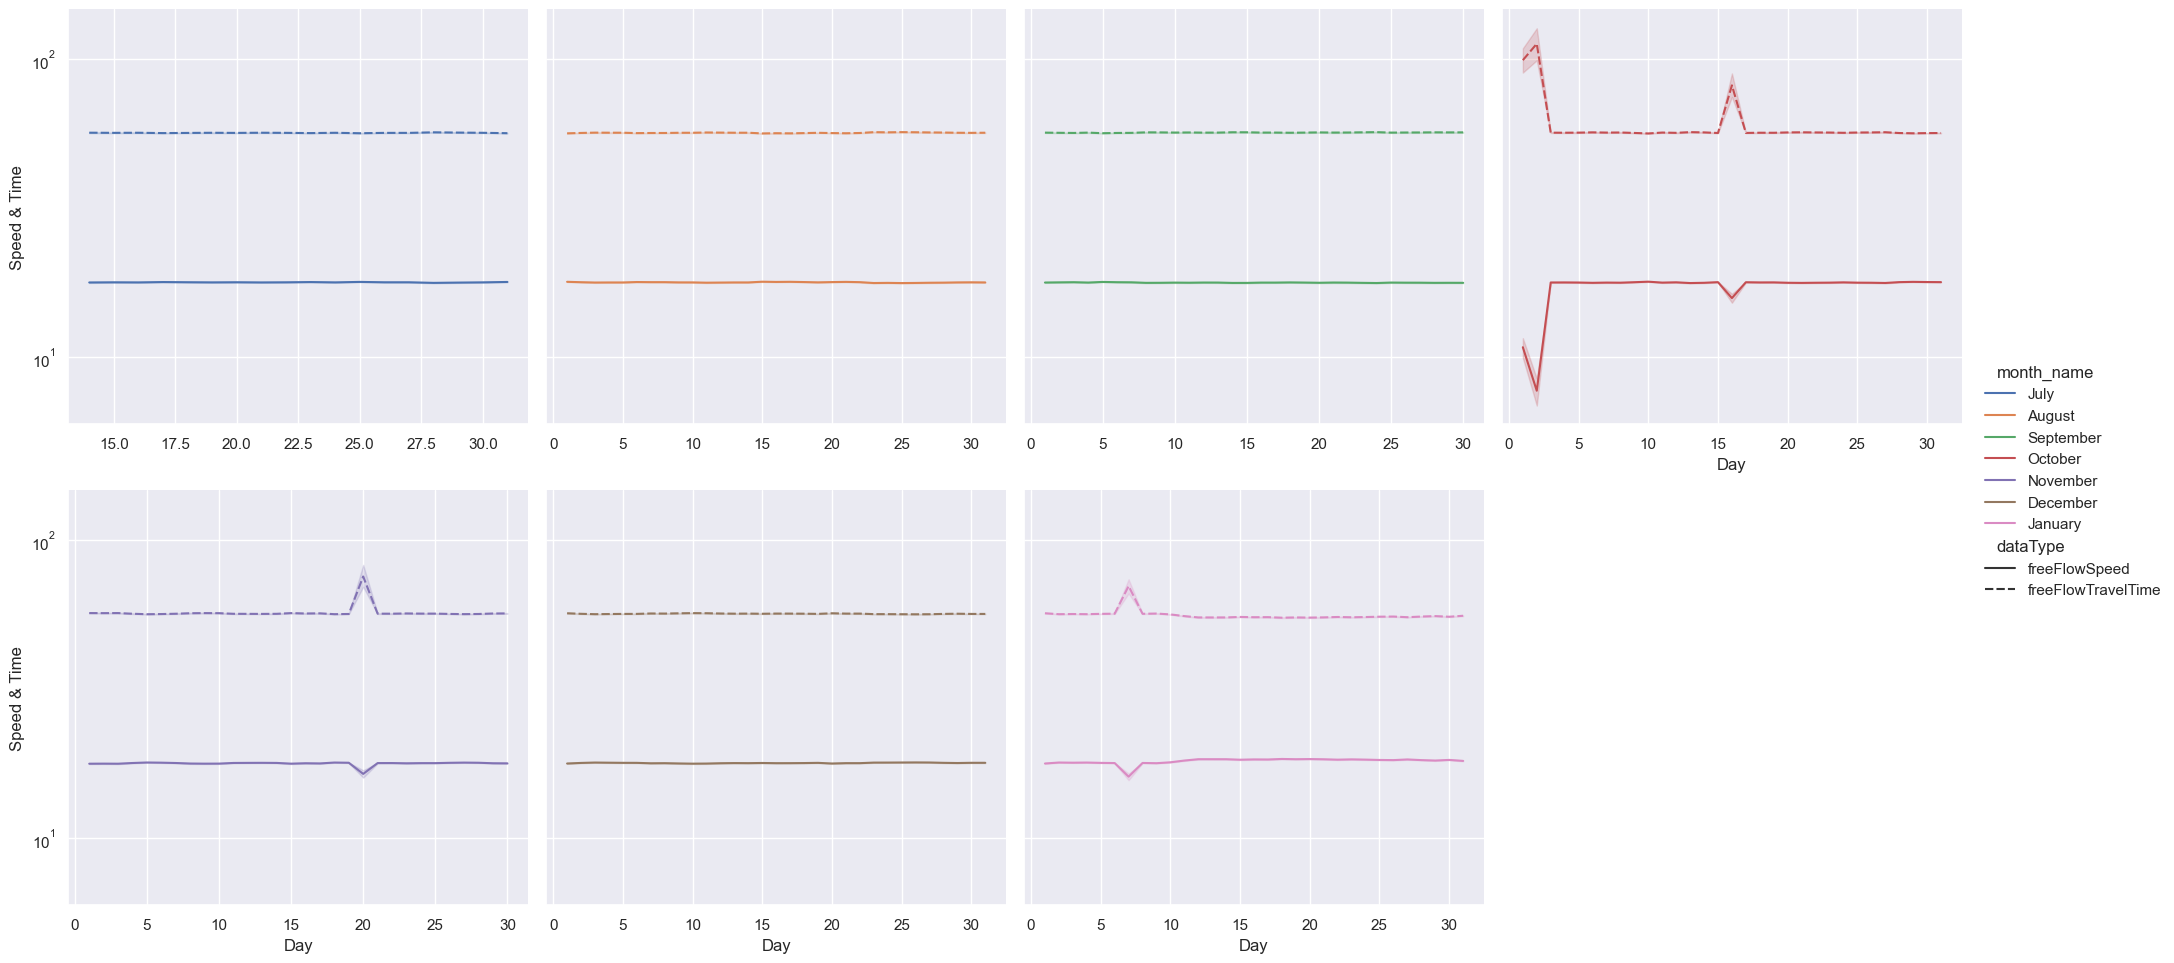

In [6]:
g = sns.relplot(data=cmp_dfm,x="day",y="value",col="month_name",hue="month_name",style="dataType",
                col_wrap=4,kind="line",facet_kws={"sharex":False})
g.set_axis_labels("Day", "Speed & Time")
g.set_titles(col_template="")
g.set(yscale="log")
plt.savefig("./plots/060_free_flow_speed_vs_travel_time.eps", format="eps", bbox_inches="tight")
plt.savefig("./plots/060_free_flow_speed_vs_travel_time.png", bbox_inches="tight")